In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
test = pd.read_csv("yelp242_test.csv")
train = pd.read_csv("yelp242_train.csv")

In [3]:
train.head()

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,3.5,79,FALSE,'full_bar',TRUE,'no',(Missing),(Missing),(Missing),FALSE,TRUE,(Missing),FALSE
1,4.5,339,TRUE,'beer_and_wine',TRUE,'no',TRUE,(Missing),(Missing),FALSE,FALSE,(Missing),FALSE
2,4.0,108,TRUE,'none',TRUE,'free',FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
3,4.5,106,FALSE,'full_bar',TRUE,(Missing),(Missing),(Missing),(Missing),TRUE,TRUE,FALSE,(Missing)
4,3.0,3,TRUE,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing)


## 1) a)  I think this approach seems fine to start with. As I explore the data a little more, I am sure I will be able to pick up on patterns about what a missing value could actually indicate for a specific variable. In particular, I am thinking of a situation where a variable like Wheelchair accessibility would need specific indication (i.e True) that it is present and in other cases it would default to assuming that it is not, in which case it would have a missing value. Similarly for the variable DogsAllowed. However, with variables such as Wifi, which are assumed to be commonplace, a missing value would have the opposite interpretation. Hence, I think dealing with Missing values as a separate category could be a decent starting approach. In the most ideal case we would either be able to remove these instances from our model so we have only those instances with complete information but I realise this is not always a realistic method. 

## b) 


### i) Building a regression model for predicting stars based on all features.

In [4]:
y_train = train['stars']
X_train = pd.get_dummies(train.drop(['stars'], axis=1))
X_train

,review_count,GoodForKids_(Missing),GoodForKids_FALSE,GoodForKids_TRUE,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_(Missing),BusinessAcceptsCreditCards_(Missing),BusinessAcceptsCreditCards_FALSE,...,OutdoorSeating_TRUE,RestaurantsReservations_(Missing),RestaurantsReservations_FALSE,RestaurantsReservations_TRUE,DogsAllowed_(Missing),DogsAllowed_FALSE,DogsAllowed_TRUE,Caters_(Missing),Caters_FALSE,Caters_TRUE
0,79,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,339,0,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,108,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,106,0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
4,3,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267,949,0,0,1,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
6268,28,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
6269,116,0,0,1,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
6270,523,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [5]:
#Linear regression model 

# fitting the model using (Missing) as a reference level 
linreg_model = smf.ols(formula = 'stars ~ review_count + C(GoodForKids, Treatment(reference="(Missing)")) + C(Alcohol, Treatment(reference="(Missing)")) + C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)")) + C(WiFi, Treatment(reference="(Missing)")) + C(BikeParking, Treatment(reference="(Missing)")) + C(ByAppointmentOnly, Treatment(reference="(Missing)")) + C(WheelechairAccessible, Treatment(reference="(Missing)")) + C(OutdoorSeating, Treatment(reference="(Missing)")) + C(RestaurantsReservations, Treatment(reference="(Missing)")) + C(DogsAllowed, Treatment(reference="(Missing)")) + C(Caters, Treatment(reference="(Missing)"))', data = train).fit()

# Getting results of lin reg model
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     53.24
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          2.48e-239
Time:                        11:17:28   Log-Likelihood:                -7305.6
No. Observations:                6272   AIC:                         1.466e+04
Df Residuals:                    6246   BIC:                         1.484e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    3.3541      0.040     84.809      0.000       3.277       3.432
C(GoodForKids, Treatment(reference="(Missing)"))[T.FALSE]                   -0.0374      0.046     -0.810      0.418      -0.128       0.053
C(GoodForKids, Treatment(reference="(Missing)"))[T.TRUE]                    -0.1527      0.036     -4.286      0.000      -0.222      -0.083
C(Alcohol, Treatment(reference="(Missing)"))[T.'beer_and_wine']              0.2255      0.048      4.736      0.000       0.132       0.319
C(Alcohol, Treatment(reference="(Missing)"))[T.'full_bar']                   0.1352      0.044      3.083      0.002       0.049       0.221
C(Alcohol, Treatment(reference="(Missing)"))[T.'none']                       0.1196      0.040      3.023      0.003       0.042       0.197
C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)"))[T.FALSE]     0.6037      0.092      6.548      0.000       0.423       0.784
C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)"))[T.TRUE]      0.0819      0.047      1.752      0.080      -0.010       0.174
C(WiFi, Treatment(reference="(Missing)"))[T.'free']                          0.0856      0.035      2.457      0.014       0.017       0.154
C(WiFi, Treatment(reference="(Missing)"))[T.'no']                            0.0802      0.034      2.393      0.017       0.014       0.146
C(WiFi, Treatment(reference="(Missing)"))[T.'paid']                         -0.2286      0.106     -2.157      0.031      -0.436      -0.021
C(BikeParking, Treatment(reference="(Missing)"))[T.FALSE]                   -0.1542      0.032     -4.778      0.000      -0.218      -0.091
C(BikeParking, Treatment(reference="(Missing)"))[T.TRUE]                    -0.0814      0.029     -2.815      0.005      -0.138      -0.025
C(ByAppointmentOnly, Treatment(reference="(Missing)"))[T.FALSE]              0.1250      0.034      3.636      0.000       0.058       0.192
C(ByAppointmentOnly, Treatment(reference="(Missing)"))[T.TRUE]               0.2666      0.108      2.466      0.014       0.055       0.479
C(WheelechairAccessible, Treatment(reference="(Missing)"))[T.FALSE]          0.7184      0.088      8.168      0.000       0.546       0.891
C(WheelechairAccessible, Treatment(reference="(Missing)"))[T.TRUE]           0.3566      0.028     12.878      0.000       0.302       0.411
C(OutdoorSeating, Treatment(reference="(Missing)"))[T.FALSE]                -0.0652      0.040     -1.614      0.106      -0.144       0.014
C(OutdoorSeating, Treatment(reference="(Missing)"))[T.TRUE]                  0.0315      0.043      0.727      0.467      

## ii)

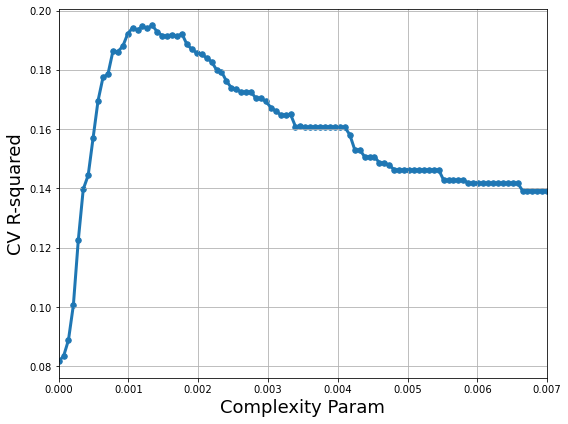

Best ccp_alpha {'ccp_alpha': 0.0013434343434343434}


In [30]:
## Tree based model (CART algo)
## Array of different cp values to cross-validate
grid_values = {'ccp_alpha': np.linspace(0, 0.007, 100)}

# create regression tree
regtree_model = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=90)
## Splitting into 5 random folkds and then applying GridSearch since GridSearchCV will split the training data without shuffling. 
cv = KFold(n_splits=5,random_state=1,shuffle=True) 

regtree_model_cv = GridSearchCV(regtree_model, param_grid=grid_values, scoring='r2', cv=cv, verbose=0)
regtree_model_cv.fit(X_train, y_train)

# Best param selection (from lab)
ccp_alpha = regtree_model_cv.cv_results_['param_ccp_alpha'].data
R2_scores = regtree_model_cv.cv_results_['mean_test_score']
plt.figure(figsize=(8, 6))
plt.xlabel('Complexity Param', fontsize=18)
plt.ylabel('CV R-squared', fontsize=18)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.007])
plt.tight_layout()
plt.show()
print('Best ccp_alpha', regtree_model_cv.best_params_)

I used a k-fold method with 5 splits for the above CV. I was a little unsure of how to initially select the grid space for the ccp_alpha parameter and started off with "np.linspace(0, 0.01, 100)" but eventually saw that it tapered off very quickly and hence, reduced the space iteratively as it would also be more computationally expensive with a larger range.  I plotted the complexity param and the corresponding r-squared value of the model with said complexity parameter. 
We see that our regression tree model achieves its highest r-squared value at ccp_alpha = 0.001343434, which is confirmed visually by seeing how quickly r-squared value falls after 0.0013434.

In [31]:
# Calc OSR^2 of a given linear regression model
def linreg_OSR2(model, df_train, df_test, dependent_var):   
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    return 1 - SSE/SST

# Calc OSR^2 of a given regression tree 
def regtree_OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [32]:
# Creating test data sets

y_test = test['stars']
X_test = pd.get_dummies(test.drop(['stars'], axis=1))

## iii)

In [33]:
# Compute OSR squared and MAE for the above two models 

# linear regression model
print('Linear Regression OSR2:', round(linreg_OSR2(linreg_model,train, test, 'stars'), 5))
print('Linear Regression MAE:', round(mean_absolute_error(y_test, linreg_model.predict(test)), 5))

# regression tree model  
print('Regression Tree OSR2:', round(regtree_OSR2(regtree_model_cv, X_test, y_test, y_train), 5))
print('Regression Tree MAE:', round(mean_absolute_error(y_test, regtree_model_cv.predict(X_test)), 5))

Linear Regression OSR2: 0.14347
Linear Regression MAE: 0.61666
Regression Tree OSR2: 0.13753
Regression Tree MAE: 0.61355


I don't think these models perform well at all. The OSR squared values for both models are very low. 
The OSR suqared values for both models are very low, at 0.143 and 0.1375 for the linear regression and regression tree models, respectively. The linear regression model achieves a marginally higher OSR-squared value.
Both models have an MAE around 0.61. Lin reg model has a very marginally higher MAE value. 

## C) 


In [34]:
## Creating the fourOrAbove variable 
train['fourOrAbove'] = (train['stars'] >= 4).astype(int)
test['fourOrAbove'] = (test['stars'] >= 4).astype(int)

In [35]:
display(test.head(), test.tail())

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters,fourOrAbove
0,3.0,28,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),TRUE,(Missing),(Missing),(Missing),0
1,4.0,177,TRUE,'beer_and_wine',TRUE,(Missing),TRUE,FALSE,(Missing),(Missing),(Missing),FALSE,TRUE,1
2,3.5,58,TRUE,(Missing),TRUE,(Missing),(Missing),(Missing),(Missing),(Missing),TRUE,(Missing),(Missing),0
3,3.5,6,(Missing),(Missing),TRUE,(Missing),TRUE,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),0
4,2.0,37,(Missing),(Missing),TRUE,(Missing),TRUE,FALSE,TRUE,(Missing),(Missing),(Missing),(Missing),0


,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters,fourOrAbove
2683,4.0,771,TRUE,'full_bar',TRUE,'free',TRUE,FALSE,(Missing),TRUE,TRUE,(Missing),TRUE,1
2684,3.5,203,TRUE,'beer_and_wine',TRUE,'free',FALSE,(Missing),TRUE,FALSE,FALSE,FALSE,FALSE,0
2685,4.0,10,FALSE,'full_bar',TRUE,(Missing),FALSE,(Missing),(Missing),FALSE,TRUE,(Missing),(Missing),1
2686,2.5,37,TRUE,'none',TRUE,'no',TRUE,(Missing),(Missing),FALSE,FALSE,(Missing),TRUE,0
2687,4.0,335,FALSE,'full_bar',TRUE,'free',TRUE,(Missing),TRUE,TRUE,TRUE,(Missing),FALSE,1


## D) Classification model 

## i) 

### I think I would need more information before I can decide if this is a good metric. As in class, we talked about this weighting scheme wiuth reference to the goal of the model. Thus, I think if I can better understand what this model will be used for I will be able to better ansnwer this question.  Example: if we use this model for making restaurant recommendations to Yelp users, then we should penalize false positives more heavily than false negatives as we don't want to give them a bad recommendation.   If you were only trying to accurately predict the stars of a restaurant, then equally weighting false positives and false negatives is the right thing to do while in my example, accuracy might not be the most useful. 


### ii) Using thresholding

In [36]:
## Classifying by thresholding previously made models

# New y_train and y_test should be fourOrAbove
y_train_new = train['fourOrAbove']
X_train_new = pd.get_dummies(train.drop(['fourOrAbove', 'stars'], axis=1))
y_test_new = test['fourOrAbove']
X_test_new = pd.get_dummies(test.drop(['fourOrAbove', 'stars'], axis=1))

# Thresholded models
linreg_new_pred = (linreg_model.predict(test) >= 4).astype(int)
regtree_new_pred = (regtree_model_cv.predict(X_test_new) >= 4).astype(int)

### iii) Logistic reg with Missing vals

In [37]:

logreg_model = smf.logit(formula = 'fourOrAbove ~ review_count + C(GoodForKids, Treatment(reference="(Missing)")) + C(Alcohol, Treatment(reference="(Missing)")) + C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)")) + C(WiFi, Treatment(reference="(Missing)")) + C(BikeParking, Treatment(reference="(Missing)")) + C(ByAppointmentOnly, Treatment(reference="(Missing)")) + C(WheelechairAccessible, Treatment(reference="(Missing)")) + C(OutdoorSeating, Treatment(reference="(Missing)")) + C(RestaurantsReservations, Treatment(reference="(Missing)")) + C(DogsAllowed, Treatment(reference="(Missing)")) + C(Caters, Treatment(reference="(Missing)"))', data = train).fit()

#Getting results
logreg_model.summary()

Optimization terminated successfully.
         Current function value: 0.604944
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            fourOrAbove   No. Observations:                 6272
Model:                          Logit   Df Residuals:                     6246
Method:                           MLE   Df Model:                           25
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                  0.1193
Time:                        15:27:42   Log-Likelihood:                -3794.2
converged:                       True   LL-Null:                       -4308.3
Covariance Type:            nonrobust   LLR p-value:                6.235e-201
============================================================================================================================================
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                   -0.4067      0.105     -3.881      0.000      -0.612      -0.201
C(GoodForKids, Treatment(reference="(Missing)"))[T.FALSE]                    0.0733      0.129      0.566      0.571      -0.180       0.327
C(GoodForKids, Treatment(reference="(Missing)"))[T.TRUE]                    -0.3501      0.100     -3.500      0.000      -0.546      -0.154
C(Alcohol, Treatment(reference="(Missing)"))[T.'beer_and_wine']              0.1646      0.136      1.214      0.225      -0.101       0.430
C(Alcohol, Treatment(reference="(Missing)"))[T.'full_bar']                  -0.0886      0.125     -0.708      0.479      -0.334       0.157
C(Alcohol, Treatment(reference="(Missing)"))[T.'none']                       0.3170      0.113      2.812      0.005       0.096       0.538
C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)"))[T.FALSE]     1.3447      0.265      5.071      0.000       0.825       1.864
C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)"))[T.TRUE]      0.0483      0.125      0.387      0.699      -0.197       0.293
C(WiFi, Treatment(reference="(Missing)"))[T.'free']                          0.2203      0.098      2.256      0.024       0.029       0.412
C(WiFi, Treatment(reference="(Missing)"))[T.'no']                            0.1339      0.094      1.421      0.155      -0.051       0.319
C(WiFi, Treatment(reference="(Missing)"))[T.'paid']                         -0.6393      0.347     -1.843      0.065      -1.319       0.041
C(BikeParking, Treatment(reference="(Missing)"))[T.FALSE]                   -0.4535      0.092     -4.910      0.000      -0.635      -0.272
C(BikeParking, Treatment(reference="(Missing)"))[T.TRUE]                    -0.2525      0.081     -3.125      0.002      -0.411      -0.094
C(ByAppointmentOnly, Treatment(reference="(Missing)"))[T.FALSE]              0.4477      0.100      4.485      0.000       0.252       0.643
C(ByAppointmentOnly, Treatment(reference="(Missing)"))[T.TRUE]               0.6436      0.339      1.900      0.057      -0.020       1.307
C(WheelechairAccessible, Treatment(reference="(Missing)"))[T.FALSE]          1.8272      0.306      5.961      0.000       1.226       2.428
C(WheelechairAccessible, Treatment(reference="(Missing)"))[T.TRUE]           0.9426      0.076     12.427      0.000       0.794       1.091
C(OutdoorSeating, Treatment(reference="(Missing)"))[T.FALSE]                -0.2048      0.112     -1.824      0.068      -0.425       0.015
C(OutdoorSeating, Treatment(reference="(Missing)"))[T.TRUE]                 -0.0410      0.120     -0.342      0.733      -0.276       0.194
C(RestaurantsReservations, Treatment(reference="(Missing)"))[T.FALSE]       -0.3154      0.115     -2.742      0.006      -0.541      -0.09

In [38]:
# Logistic Regression predictions
logreg_prob = logreg_model.predict(test)
logreg_pred = pd.Series([1 if x > 1/2 else 0 for x in logreg_prob], index=logreg_prob.index)

In [39]:
#print(logreg_prob, logreg_pred)

### iv) Classification Tree

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   11.1s finished


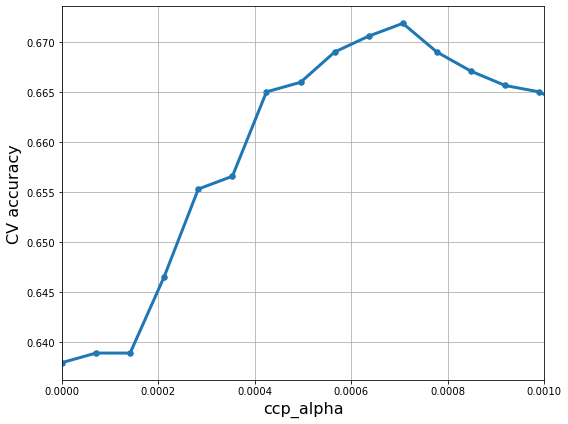

Best ccp_alpha {'ccp_alpha': 0.0007070707070707071}


In [40]:
## Classification Tree with complexity parameter selected using CV


# create an array of different cp values to cross-validate
classification_grid_values = {'ccp_alpha': np.linspace(0, 0.007, 100)}
# create regression tree
classification_tree_model = DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=20, random_state=90)
### Note that the line below is important. It ensures that the training data is split into
### five folds randomly. Recall what we've seen in the discussion slides that by default,
### GridSearchCV will split the training data without shuffling. 
classification_cv = KFold(n_splits=5,random_state=1,shuffle=True) 
### by setting random_state as a fixed number, we ensure that each time the GridSearchCV splits data, we get the 
### same split.
classification_tree_model_cv = GridSearchCV(classification_tree_model, param_grid=classification_grid_values, 
                                            scoring='accuracy', cv=classification_cv, verbose=1)
classification_tree_model_cv.fit(X_train_new, y_train_new)

# selecting the best parameter (also from lab 7)
ccp_alpha = classification_tree_model_cv.cv_results_['param_ccp_alpha'].data
accuracy_scores = classification_tree_model_cv.cv_results_['mean_test_score']
plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV accuracy', fontsize=16)
plt.scatter(ccp_alpha, accuracy_scores, s=30)
plt.plot(ccp_alpha, accuracy_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.001])

plt.tight_layout()
plt.show()
print('Best ccp_alpha', classification_tree_model_cv.best_params_)

I used the exact same approach as part (a).  I used GridSearchCV method for cross-validation with 5-fold cv-splits and then plotted the model accuracy for each ccp_alpha value. The accuracy increases a lot and achieves a maximum accuracy of ~0.675 at around ccp_alpha = 0.000707 before declining potentially due to overfitting.

In [41]:
#New prediction from this model 
classification_tree_pred = classification_tree_model_cv.predict(X_test_new)

## v) Creating results table 

In [42]:
## v) Creating results table 

In [43]:
## Using function from lab to get accuracy, TPR, and FPR
def statistics(modelpred):
    cm = confusion_matrix(y_test_new, modelpred)
    acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
    tpr = (cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2]))
    fpr = (cm.ravel()[1]/(cm.ravel()[0]+cm.ravel()[1]))
    return(acc, tpr, fpr)

In [44]:
# Performance evaluation table 

Accuracy = np.array([])
TPR = np.array([])
FPR = np.array([])

# Baseline stats
default_false_test = np.sum(test['fourOrAbove'] == 0)
default_true_test = np.sum(test['fourOrAbove'] == 1)
accuracy_baseline = default_false_test/(default_false_test+default_true_test)
tpr_baseline = 0 / (0 + default_true_test)
fpr_baseline = 0 / (0 + default_false_test)
Accuracy = np.append(Accuracy, accuracy_baseline)
TPR = np.append(TPR, tpr_baseline)
FPR = np.append(FPR, fpr_baseline)

# Thresholded Linear Regression statistics
(acc, tpr, fpr) = statistics(linreg_new_pred)
Accuracy = np.append(Accuracy, acc)
TPR = np.append(TPR, tpr)
FPR = np.append(FPR, fpr)

# Thresholded Regression Tree statistics
(acc, tpr, fpr) = statistics(regtree_new_pred)
Accuracy = np.append(Accuracy, acc)
TPR = np.append(TPR, tpr)
FPR = np.append(FPR, fpr)

# Logistic Regression statistics
(acc, tpr, fpr) = statistics(logreg_pred)
Accuracy = np.append(Accuracy, acc)
TPR = np.append(TPR, tpr)
FPR = np.append(FPR, fpr)

# Classification Tree statistics
(acc, tpr, fpr) = statistics(classification_tree_pred)
Accuracy = np.append(Accuracy, acc)
TPR = np.append(TPR, tpr)
FPR = np.append(FPR, fpr)

    
display(Accuracy, TPR, FPR)

array([0.56547619, 0.62686012, 0.61904762, 0.67001488, 0.65178571])

array([0.        , 0.19863014, 0.16523973, 0.47945205, 0.42636986])

array([0.        , 0.04407895, 0.03223684, 0.18355263, 0.175     ])

In [45]:
# using dataframe to display

d = {'Accuracy': Accuracy, 'TPR': TPR, 'FPR': FPR}
index = ['Baseline', 'Thresholded Linear Regression', 'Thresholded Regression Tree', 'Logistic Regression', 'Classification Tree']

results = pd.DataFrame(data = d, index = index)
results

,Accuracy,TPR,FPR
Baseline,0.565476,0.000000,0.000000
Thresholded Linear Regression,0.626860,0.198630,0.044079
Thresholded Regression Tree,0.619048,0.165240,0.032237
Logistic Regression,0.670015,0.479452,0.183553
Classification Tree,0.651786,0.426370,0.175000


From the table above we see that all four models we constructed after the baseline model outperform it. This is a great place to start. From here we see that the logistic regression model performs the best as it has the highest accuracy along with a high true positive rate and a low false positive rate. I do think we have missed out on some accuracy as a random forest model or a boosted tree model with cross-validation has a lot of potential. I will try to use these for the next part of the question. The good part about the above models is that they have high interpretability unlike a random forest model. And thus, they make for good models to use as restaurants can deploy them on their own without fear of interpretability. Since the coefficients of our best performing model aka logistic reg, are not the most easily interpretable I would argue that boosted classification trees could be useful here as not only are they interpretable but could improve accuracy as the baseline classification model and logistic regression are not too far apart in terms of accuracy. 

## e) Tips to achieve a higher star rating.

I think I will experiment with a new model, specifically random forest so I can get more information on feature importance and create what could be a better model. 

In [47]:
# Create grid for cv values of m
random_forest_grid_values = {'max_features': np.linspace(1,36,36, dtype='int32'), 'min_samples_leaf': [5], 'n_estimators': [500], 'random_state': [90]} 
# Create model and cross-validate
random_forest = RandomForestClassifier() 
rf_cv = KFold(n_splits=5,random_state=90,shuffle=True) 
random_forest_cv = GridSearchCV(random_forest, param_grid=random_forest_grid_values, scoring='accuracy', cv=rf_cv,verbose=2)
random_forest_cv.fit(X_train_new, y_train_new)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_features=1, min_samples_leaf=5, n_estimators=500, random_state=90 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=1, min_samples_leaf=5, n_estimators=500, random_state=90, total=   1.1s
[CV] max_features=1, min_samples_leaf=5, n_estimators=500, random_state=90 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_features=1, min_samples_leaf=5, n_estimators=500, random_state=90, total=   1.1s
[CV] max_features=1, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=1, min_samples_leaf=5, n_estimators=500, random_state=90, total=   1.1s
[CV] max_features=1, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=1, min_samples_leaf=5, n_estimators=500, random_state=90, total=   1.1s
[CV] max_features=1, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=1, min_samples_leaf=5, n_estimators=500, random_state=90, total=   1.1s
[CV] max_features=2, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=2, min_samples_leaf=5, n_estimators=500, random_state=90, total=   1.2s
[CV] max_features=2, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=2, min_samples_leaf=5, n_estimators=500, random_state=90, total=   1.2s
[CV] max_features=2, min_samples_leaf=5, n_estimators=500, random_state=90

[CV]  max_features=11, min_samples_leaf=5, n_estimators=500, random_state=90, total=   2.4s
[CV] max_features=11, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=11, min_samples_leaf=5, n_estimators=500, random_state=90, total=   2.4s
[CV] max_features=11, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=11, min_samples_leaf=5, n_estimators=500, random_state=90, total=   2.4s
[CV] max_features=11, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=11, min_samples_leaf=5, n_estimators=500, random_state=90, total=   2.4s
[CV] max_features=11, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=11, min_samples_leaf=5, n_estimators=500, random_state=90, total=   2.4s
[CV] max_features=12, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=12, min_samples_leaf=5, n_estimators=500, random_state=90, total=   2.5s
[CV] max_features=12, min_samples_leaf=5, n_estimators=500, ran

[CV]  max_features=20, min_samples_leaf=5, n_estimators=500, random_state=90, total=   3.7s
[CV] max_features=21, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=21, min_samples_leaf=5, n_estimators=500, random_state=90, total=   4.0s
[CV] max_features=21, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=21, min_samples_leaf=5, n_estimators=500, random_state=90, total=   3.6s
[CV] max_features=21, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=21, min_samples_leaf=5, n_estimators=500, random_state=90, total=   3.6s
[CV] max_features=21, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=21, min_samples_leaf=5, n_estimators=500, random_state=90, total=   3.6s
[CV] max_features=21, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=21, min_samples_leaf=5, n_estimators=500, random_state=90, total=   3.6s
[CV] max_features=22, min_samples_leaf=5, n_estimators=500, ran

[CV]  max_features=30, min_samples_leaf=5, n_estimators=500, random_state=90, total=   4.7s
[CV] max_features=30, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=30, min_samples_leaf=5, n_estimators=500, random_state=90, total=   4.8s
[CV] max_features=31, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=31, min_samples_leaf=5, n_estimators=500, random_state=90, total=   4.9s
[CV] max_features=31, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=31, min_samples_leaf=5, n_estimators=500, random_state=90, total=   4.7s
[CV] max_features=31, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=31, min_samples_leaf=5, n_estimators=500, random_state=90, total=   4.8s
[CV] max_features=31, min_samples_leaf=5, n_estimators=500, random_state=90 
[CV]  max_features=31, min_samples_leaf=5, n_estimators=500, random_state=90, total=   4.9s
[CV] max_features=31, min_samples_leaf=5, n_estimators=500, ran

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 10.2min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=90, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [90]},
             scoring='accuracy', verbose=2)

{'max_features': 5, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 90}


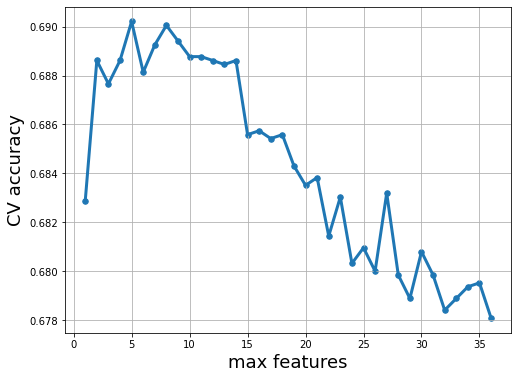

In [48]:
# Selecting optimal m
max_features = random_forest_cv.cv_results_['param_max_features'].data
rf_accuracy_scores = random_forest_cv.cv_results_['mean_test_score']
plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=18)
plt.ylabel('CV accuracy', fontsize=18)
plt.scatter(max_features, rf_accuracy_scores, s=30)
plt.plot(max_features, rf_accuracy_scores, linewidth=3)
plt.grid(True, which='both')
#plt.ylim([0.663, 0.6825])
print(random_forest_cv.best_params_)

In [87]:
random_forest_pred = random_forest_cv.predict(X_test_new)

In [88]:
(acc, tpr, fpr) = statistics(random_forest_pred)

In [89]:
## Random forest statistics 
display('Accuracy of Random Forest:',acc, 
      'TPR of Random forest:',tpr, 
      'FPR of Random forest:', fpr)

'Accuracy of Random Forest:'

0.6763392857142857

'TPR of Random forest:'

0.5154109589041096

'FPR of Random forest:'

0.2

Using the above we see that the accuracy is not substantially higher but still higher than our previously best performing model. Also, the TPR of random forest is higher than earlier, too. I will now use it to ascertain feature importance. 

In [105]:
# Feature importance table
f_imp = pd.DataFrame({'Feature' : X_train_new.columns,  
              'Importance score': 100*random_forest_cv.best_estimator_.feature_importances_}).round(1)
f_imp = f_imp.sort_values('Importance score') #ascending = False)

## I didn't include the ascending command here because of the following visualisation.

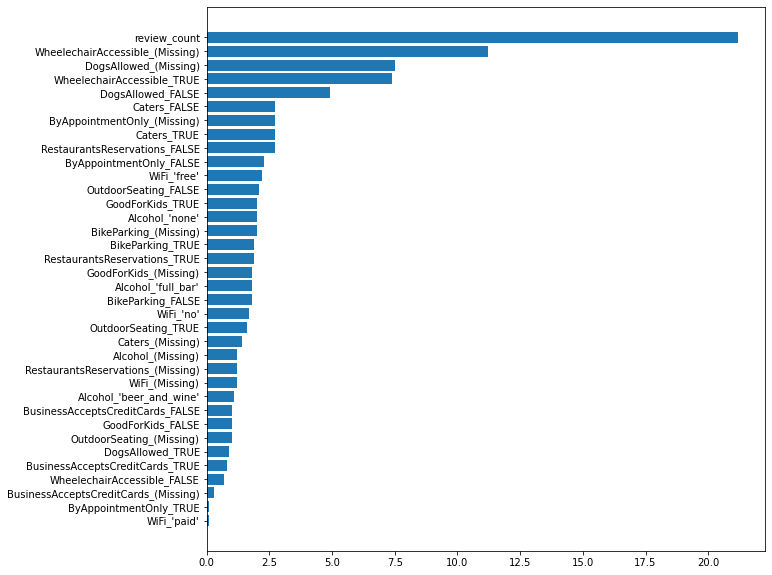

In [106]:
plt.figure(figsize=(10,10))
plt.barh(f_imp["Feature"], f_imp["Importance score"])
plt.show()

### Tips for restaurants:

#### From the above it is clear that features like the count of reviews, accessibility of the restaurant, pet friendliness, etc are very important. Hence, it could be helpful to target these in the following way: 

1.  Incentivise customers to review your restaurant once they complete their meal. For example, offer them a complimentary dessert if they show the server a completed review before their meal ends. In particular, the review should be on Yelp. 
2. - Wheelchair Accessibility appears to be a big factor in deciding the stars of a restaurant. I think this intuitively makes sense as people with disabilities that might limit their ability to walk or the elderly might need wheeelchairs at all times and in family settings, it is possible that the inaccessibility of a restaurant could result in family members leaving poor reviews without even tasting the food. Providing accurate data is a very easy fix here. Further, if your restaurant is not wheelchair accessible you should seriously consider adding a ramp or two to increase your customer reach. 
   - This accurate providing of data would also benefit the pet friendly category as that appears to be a very important feature, too. 
3.  Lastly, I would also make it much more clearer or even introduce reservation policies as the ByAppointmentOnly_(Missing) and ByAppointmentOnly_FALSE are both highly ranked on the importance scale. This could turn people away from giving a good rating. Further, the variable RestaurantsReservations is also important. I am not sure of the difference in these variables' , ByAppointmentOnly and RestaurantReservations, meanings but it is plausible that they could be referring to the ability to reserve on Yelp and whether the restaurant takes reservations or not, respectively. 

Additionally, we could use the results from our previously created models to inform our decisions, too. I chose to use only the random forest model as it delivered the highest accuracy but the logistic regression model's coefficients could be used as well. 

#### Thoughts going ahead: 
I think we could also ascertain feature importance by creating models where we leave a different variable out everytime the model is run and note down the drop in accuracy. Additionally, I think we could also use Group Lasso (due to the categorical and numerical data mix) to see which coefficients are shrunk to zero to ascertain feature importance. 